<a href="https://colab.research.google.com/github/yujinkim23/DataEngineering/blob/main/PySpark_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PySpark EDA with Chicago Crime Dataset
### Yujin Kim
#### yujin.kim@rady.ucsd.edu

## Download and install Spark

In [1]:
!ls

 reported-crimes.csv		 spark-2.3.1-bin-hadoop2.7
'rows.csv?accessType=DOWNLOAD'	 spark-2.3.1-bin-hadoop2.7.tgz
 sample_data			 spark-2.3.1-bin-hadoop2.7.tgz.1


In [2]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Reading package lists... Done


## Setup environment

[Jan 2023 update]
- Google colab recently upgraded to Python 3.8. Unfortunately this breaks spark 2.3.1. 
- Please use the code below where we install from the pyspark package instead

In [3]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [5]:
#import os
#os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

#import findspark
#findspark.init()
#from pyspark import SparkContext
#sc = SparkContext.getOrCreate()

#import pyspark
#from pyspark.sql import SparkSession
#spark = SparkSession.builder.getOrCreate() 
#spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [6]:
!wget https://data.cityofchicago.org/api/views/dwme-t96c/rows.csv?accessType=DOWNLOAD
!ls -l

--2023-02-11 18:01:51--  https://data.cityofchicago.org/api/views/dwme-t96c/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD.1’

rows.csv?accessType     [      <=>           ]  47.50M  3.11MB/s    in 16s     

2023-02-11 18:02:07 (3.01 MB/s) - ‘rows.csv?accessType=DOWNLOAD.1’ saved [49811074]

total 807720
-rw-r--r--  1 root root  49811074 Feb 11 14:43  reported-crimes.csv
-rw-r--r--  1 root root  49811074 Feb 11 14:43 'rows.csv?accessType=DOWNLOAD'
-rw-r--r--  1 root root  49811074 Feb 11 14:43 'rows.csv?accessType=DOWNLOAD.1'
drwxr-xr-x  1 root root      4096 Feb  9 14:42  sample_data
drwxrwxr-x 13 1000 1000      4096 Jun  1  2018  spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root 2258837

In [7]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 759076
-rw-r--r--  1 root root  49811074 Feb 11 14:43  reported-crimes.csv
-rw-r--r--  1 root root  49811074 Feb 11 14:43 'rows.csv?accessType=DOWNLOAD.1'
drwxr-xr-x  1 root root      4096 Feb  9 14:42  sample_data
drwxrwxr-x 13 1000 1000      4096 Jun  1  2018  spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root 225883783 Jun  1  2018  spark-2.3.1-bin-hadoop2.7.tgz
-rw-r--r--  1 root root 225883783 Jun  1  2018  spark-2.3.1-bin-hadoop2.7.tgz.1
-rw-r--r--  1 root root 225883783 Jun  1  2018  spark-2.3.1-bin-hadoop2.7.tgz.2


In [77]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2021-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR| Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12343475|   JE202728|2021-04-16 20:45:00|   056XX N RIDGE AVE|0820|        THEFT|      $500 AND UNDER|     OTHER (SPECIFY)| false|   false|2013|   

In [9]:
rc.count()

179939

## Schemas

In [10]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [11]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [12]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [13]:
labels = [
  ('ID', StringType()),
  ('Case Number', StringType()),
  ('Date', TimestampType()),
  ('Block', StringType()),
  ('IUCR', StringType()), 
  ('Primary Type', StringType()),
  ('Description', StringType()),
  ('Location Description', StringType()),
  ('Arrest', StringType()),
  ('Domestic', BooleanType()),
  ('Beat', StringType()),
  ('District', StringType()),
  ('Ward', StringType()),
  ('Community Area', StringType()),
  ('FBI Code', StringType()),
  ('X Coordinate', StringType()),
  ('Y Coordinate', StringType()),
  ('Year', IntegerType()),
  ('Updated On', StringType()),
  ('Latitude', DoubleType()),
  ('Longitude', DoubleType()),
  ('Location', StringType())
]

In [14]:
schema = StructType([StructField (x[0], x[1], True) for x in labels])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', BooleanType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Location', String

In [15]:
!ls -1

reported-crimes.csv
'rows.csv?accessType=DOWNLOAD.1'
sample_data
spark-2.3.1-bin-hadoop2.7
spark-2.3.1-bin-hadoop2.7.tgz
spark-2.3.1-bin-hadoop2.7.tgz.1
spark-2.3.1-bin-hadoop2.7.tgz.2


In [16]:
rc = spark.read.csv('reported-crimes.csv', schema=schema, header=True)

In [17]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [61]:
rc.show(5)


+--------+-----------+-------------------+--------------------+----+-------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR| Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12343475|   JE202728|2021-04-16 20:45:00|   056XX N RIDGE AVE|0820|        THEFT|      $500 AND UNDER|     OTHER (SPECIFY)| false|   false|2013|   

## Working with columns

In [19]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0460|
|0820|
|500E|
|0850|
|0486|
+----+
only showing top 5 rows



In [62]:
rc.select('Case Number','Date','Arrest').show(5)

+-----------+-------------------+------+
|Case Number|               Date|Arrest|
+-----------+-------------------+------+
|   JE202728|2021-04-16 20:45:00| false|
|   JF125633|2021-10-21 11:00:00| false|
|   JE328996|2021-08-07 02:36:00| false|
|   JE252347|2021-06-02 11:30:00|  true|
|   JE108071|2021-01-09 15:59:00|  true|
+-----------+-------------------+------+
only showing top 5 rows



### Add a column with name One, with entries all 1

In [21]:
from pyspark.sql.functions import lit

In [22]:
#rc.withColumn('One',lit(1)).show(5)

+--------+-----------+----+--------------------+----+-------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|Date|               Block|IUCR| Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+----+--------------------+----+-------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|12571973|   JE482457|null|   042XX S MOZART ST|0460|      BATTERY|              SIMPLE|            SIDEWALK|  true|    true|0921|     009|  15|            58|     08B|     1158067|

** Remove the column IUCR **

In [23]:
# rc = rc.drop('IUCR')
# rc.show(5)

#Working with rows

## Add the reported crimes for an additional day, 12-11-2021, to our dataset.

In [78]:
 one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2021-11-12'))
 one_day.count()

17

In [79]:
orc = rc.union(one_day).orderBy('Date', ascending = False)
orc.show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12588706|   JF108473|2021-11-12 00:00:00|  097XX S HALSTED ST|1154|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|     OTHER (SPECIFY)| fal

## What are the top 10 number of reported crimes by Primary type, in descendng order of occurence?

In [80]:
orc.groupby('Primary Type').count().orderBy('count',ascending = False).show(5)

+------------------+-----+
|      Primary Type|count|
+------------------+-----+
|           BATTERY|35273|
|             THEFT|34442|
|   CRIMINAL DAMAGE|21797|
|           ASSAULT|17727|
|DECEPTIVE PRACTICE|15236|
+------------------+-----+
only showing top 5 rows



## Find the percentage of reported crimes that resulted in an arrest

In [81]:
orc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [82]:
orc.filter(col('Arrest') == True).count() / orc.select('Arrest').count()

0.12816466247304897

## Find the top 3 locations for reported crimes.

In [83]:
orc.groupby('Location Description').count().orderBy('count', ascending = False).show(3)

+--------------------+-----+
|Location Description|count|
+--------------------+-----+
|              STREET|45111|
|           APARTMENT|38503|
|           RESIDENCE|28182|
+--------------------+-----+
only showing top 3 rows



## Built-in functions


In [32]:
from pyspark.sql import functions

In [33]:
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'List', 'Optional', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Union', 'UserDefinedFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_udf', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'a

## String functions

### Display the Primary Type column in lower and upper characters, and the first 4 characters of the column

In [34]:
from pyspark.sql.functions import lower, upper, substring

In [35]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [84]:
orc.select(lower(col('Primary Type')),upper(col('Primary Type')), substring(col('Primary Type'),1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
|            assault|            ASSAULT|                         ASSA|
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



## Numeric functions

### show the oldest date and the most recent date

In [37]:
from pyspark.sql.functions import min,max

In [87]:
orc.select(min(col('Date')),max(col('Date'))).show()

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2021-01-01 00:00:00|2021-11-12 00:00:00|
+-------------------+-------------------+



## Date

What is 3 days earlier than the oldest date and 3 days later than the most recent date?

In [39]:
from pyspark.sql.functions import date_add, date_sub

In [40]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start: 'ColumnOrName', days: Union[ForwardRef('ColumnOrName'), int]) -> pyspark.sql.column.Column
    Returns the date that is `days` days after `start`
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08', 2,)], ['dt', 'add'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]
    >>> df.select(date_add(df.dt, df.add.cast('integer')).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 10))]



# Working with dates

In [41]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [42]:
rc.select(to_date(lit('2021-12-25')),to_date(lit('2019-25-15'))).show(1)

+-------------------+-------------------+
|to_date(2021-12-25)|to_date(2019-25-15)|
+-------------------+-------------------+
|         2021-12-25|               null|
+-------------------+-------------------+
only showing top 1 row



2019-12-25 13:30:00

In [43]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [44]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show(1)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



25/Dec/2019 13:30:00

In [45]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [46]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show(1)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



In [47]:
nrc = spark.read.csv('reported-crimes.csv',header=True)
nrc.show(5, truncate=False)

+--------+-----------+----------------------+-------------------------+----+-------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                    |IUCR|Primary Type |Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+-------------------------+----+-------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|12571973|JE482457   |12/19/2021 07:23:00 AM|042XX S MOZART ST        |0460|BATTER

# Working with joins

### Joins

Download police station data

In [48]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls -1

--2023-02-11 18:03:14--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2023-02-11 18:03:14 (680 MB/s) - ‘police-station.csv’ saved [5699]

police-station.csv
reported-crimes.csv
'rows.csv?accessType=DOWNLOAD.1'
sample_data
spark-2.3.1-bin-hadoop2.7
spark-2.3.1-bin-hadoop2.7.tgz
spark-2.3.1-bin-hadoop2.7.tgz.1
spark-2.3.1-bin-hadoop2.7.tgz.2


In [49]:
ps = spark.read.csv('police-station.csv', header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

### The reported crimes dataset had only the district number. We should add the district name by joining with the police station dataset

In [94]:
rc.cache()
rc.count()

179939

In [51]:
ps.select(col('DISTRICT')).distinct().show(10)

+--------+
|DISTRICT|
+--------+
|       7|
|      15|
|      11|
|       3|
|       8|
|      22|
|      16|
|       5|
|      18|
|      17|
+--------+
only showing top 10 rows



In [96]:
rc.select('District').distinct().show(10)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
+--------+
only showing top 10 rows



### We should match the format of the key data to perform Join

In [53]:
from pyspark.sql.functions import lpad

In [54]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



ps.select(lpad(col("DISTRICT),3,'0')).show(5)

In [55]:
ps.select(lpad(col("DISTRICT"),3,'0')).show(5)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
+--------------------+
only showing top 5 rows



In [56]:
ps = ps.withColumn('Format_district', lpad(col("DISTRICT"),3,'0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

### Let's join two dataframe with only columns that we want to check

In [97]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').drop(
    'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
).show(3)

+--------+-----------+-------------------+--------------------+----+-------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR| Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|Format_district|
+--------+-----------+-------------------+--------------------+----+-------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|12343475|   JE202728|2021-04-16 20:45:00|   056XX N RIDGE AVE|0820|        THEFT|      $500 AND UNDER|     OTHER (SPECIFY)| false|   false|2013|     020|  48|            77|      06|2021|04/23/2021 04:51:...|      20|      Lincoln|            020|
|126

In [89]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

### what is the most frequently reported stalking criminal activities?

In [103]:
rc.select(col('Primary Type')).distinct().count()

31

In [107]:
rc.select(col('Primary Type')).distinct().orderBy('Primary Type').show(31,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON-CRIMINAL                     |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN       |
|OTHER NARCOTIC VIOLATION         |
|OTHER OFFENSE                    |
|PROSTITUTION                     |
|PUBLIC INDECENCY           

In [115]:
ncrc = rc.filter(col('Primary Type') == 'STALKING')
ncrc.show(30)


+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12345574|   JE205865|2021-04-14 00:00:00| 060XX S SANGAMON ST|0580|    STALKING|              SIMPLE|           APARTMENT| false|    true|0712|     00

In [117]:
ncrc.groupBy(col('Description')).count().orderBy('count', ascending=False).show(truncate=False)

+--------------------------------------+-----+
|Description                           |count|
+--------------------------------------+-----+
|SIMPLE                                |196  |
|VIOLATION OF STALKING NO CONTACT ORDER|92   |
|CYBERSTALKING                         |28   |
|AGGRAVATED                            |3    |
+--------------------------------------+-----+



The most frequent stalking criminal activity is descriped as 'SIMPLE'.

### Which day of the week with the most reported crime?

In [100]:
from pyspark.sql.functions import date_format


df = rc.withColumn("Day", date_format(col("Date"), "E"))
df.select("Date", "Day").show(5)

+-------------------+---+
|               Date|Day|
+-------------------+---+
|2021-04-16 20:45:00|Fri|
|2021-10-21 11:00:00|Thu|
|2021-08-07 02:36:00|Sat|
|2021-06-02 11:30:00|Wed|
|2021-01-09 15:59:00|Sat|
+-------------------+---+
only showing top 5 rows



In [118]:
df.groupby('Day').count().orderBy('count',ascending=False).show()

+---+-----+
|Day|count|
+---+-----+
|Fri|26410|
|Sat|26271|
|Sun|26123|
|Mon|25880|
|Tue|25391|
|Wed|25311|
|Thu|24553|
+---+-----+



Friday has the most reported crime.

### Why don't we plot this to get some visual insights?

In [119]:
df.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=26123),
 Row(date_format(Date, E)='Mon', count=25880),
 Row(date_format(Date, E)='Thu', count=24553),
 Row(date_format(Date, E)='Sat', count=26271),
 Row(date_format(Date, E)='Wed', count=25311),
 Row(date_format(Date, E)='Fri', count=26410),
 Row(date_format(Date, E)='Tue', count=25391)]

In [127]:
dow = [x[0] for x in df.groupBy(date_format(col('Date'),'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [128]:
cnt = [x[1] for x in df.groupBy(date_format(col('Date'),'E')).count().collect()]
cnt

[26123, 25880, 24553, 26271, 25311, 26410, 25391]

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
cp = pd.DataFrame({'Day_of_week' : dow, 'Count' : cnt})
cp.head(7)

,Day_of_week,Count
0,Sun,26123
1,Mon,25880
2,Thu,24553
3,Sat,26271
4,Wed,25311
5,Fri,26410
6,Tue,25391


Text(0.5, 1.0, 'No. of reported crimes per day of the week 2021')

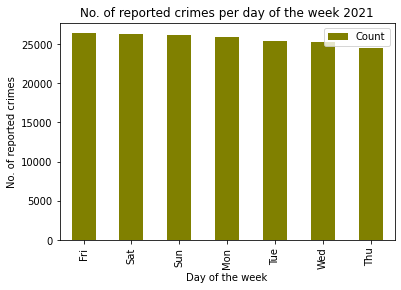

In [132]:
cp.sort_values('Count', ascending=False).plot(kind='bar', color='olive', x='Day_of_week', y='Count')
plt.xlabel('Day of the week')
plt.ylabel('No. of reported crimes')
plt.title('No. of reported crimes per day of the week 2021')

# RDDs

### RDDs setup

In [140]:

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [160]:
psrdd = sc.textFile('police-station.csv')
ps_header = psrdd.take(1)[0]
print(ps_header)

DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION


In [159]:
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [162]:
ps_rest = psrdd.filter(lambda line: line != ps_header)

ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

### How many police stations are there?

In [163]:
ps_rest.map(lambda line: line.split(',')).count()

24

### Let's disply the District ID, District name, Address and Zip for the police station with District ID 7

In [168]:
(ps_rest.filter(lambda line: line.split(',')[0] == '7').
 map(lambda line: (line.split(',')[0],
                  line.split(',')[1],
                  line.split(',')[2],
                  line.split(',')[5],
                  )).collect())

[('7', 'Englewood', '1438 W 63rd St', '60636')]

### Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code

In [170]:
(ps_rest.filter(lambda line: line.split(',')[0] in ['10','11']).
 map(lambda line: (line.split(',')[0],
                  line.split(',')[1],
                  line.split(',')[2],
                  line.split(',')[5],
                  )).collect())

[('10', 'Ogden', '3315 W Ogden Ave', '60623'),
 ('11', 'Harrison', '3151 W Harrison St', '60612')]